# https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

<h1><center> Customer Churn Prediction </center></h1> 
<h4><center> Author: Vasil Kichukov </center></h4> 

## References

1. [Kaggle - Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

2.  [Supervised Learning Models](https://www.ibm.com/cloud/learn/supervised-learning)

3. Boehme, A. K., Esenwa, C., & Elkind, M. S. (2017). Stroke risk factors, genetics, and prevention. Circulation research, 120(3), 472-495.

4. Hardie, K., Hankey, G. J., Jamrozik, K., Broadhurst, R. J., & Anderson, C. (2004). Ten-year risk of first recurrent stroke and disability after first-ever stroke in the Perth Community Stroke Study. Stroke, 35(3), 731-735.

5. Kapral, M., et.al. (2019). Rural-urban differences in stroke risk factors, incidence, and mortality in people with and without prior stroke: The CANHEART stroke study. Circulation: Cardiovascular Quality and Outcomes, 12(2),e004973. 

6. Truelsen, T., Piechowski‐Jóźwiak, B., Bonita, R., Mathers, C., Bogousslavsky, J., & Boysen, G. (2006). Stroke incidence and prevalence in Europe: a review of available data. European journal of neurology, 13(6), 581-598.


## Abstract ##

## Introduction ##


## Dataset Representation ## 

CustomerID: A unique ID that identifies each customer.

Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

Country: The country of the customer’s primary residence.

State: The state of the customer’s primary residence.

City: The city of the customer’s primary residence.

Zip Code: The zip code of the customer’s primary residence.

Lat Long: The combined latitude and longitude of the customer’s primary residence.

Latitude: The latitude of the customer’s primary residence.

Longitude: The longitude of the customer’s primary residence.

Gender: The customer’s gender: Male, Female

Senior Citizen: Indicates if the customer is 65 or older: Yes, No

Partner: Indicate if the customer has a partner: Yes, No

Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

## Reading, Tidying and Cleaning data

In [2]:
client_data = pd.read_excel("data/telco_customer_churn.xlsx")  
client_data.tail(5)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,...,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN


In [3]:
client_data.shape[0] - len(client_data.CustomerID.unique())

0

Since each client has a unique ID, we can better organize the data by using this column as the index. Additionally, to make things clearer, let's rename some columns, unify them with underscores, and adopt lowercase conventions.

In [4]:
column_names = ["customer_id","count", "country","state","city","zip_code","lat_long","latitude","longitude",
                "gender","senior_citizen","partner","dependents","total_months","home_phone","multiple_phones",
                "internet_service","online_security","online_backup","device_protection","tech_support","streaming_tv",
                "streaming_movies","contract","paperless_billing","payment_method","monthly_charges","total_charges",
                "churn_label","churn_value","churn_score","customer_value","churn_reason"]
client_data.columns = column_names
client_data.index = client_data["customer_id"]
client_data.drop("customer_id", axis=1, inplace= True)
client_data.head()

,count,country,state,city,zip_code,lat_long,latitude,longitude,gender,senior_citizen,...,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_value,churn_score,customer_value,churn_reason
customer_id,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
client_data.dtypes

count                  int64
country               object
state                 object
city                  object
zip_code               int64
lat_long              object
latitude             float64
longitude            float64
gender                object
senior_citizen        object
partner               object
dependents            object
total_months           int64
home_phone            object
multiple_phones       object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges         object
churn_label           object
churn_value            int64
churn_score            int64
customer_value         int64
churn_reason          object
dtype: object

When we first look at the data types, we notice that the "total charges" column should be a number, but right now, it's labeled as object. To fix this, let's change it to a number.

In [6]:
client_data['total_charges'] = pd.to_numeric(client_data['total_charges'], errors='coerce')

In [7]:
client_data.isna().sum()

count                   0
country                 0
state                   0
city                    0
zip_code                0
lat_long                0
latitude                0
longitude               0
gender                  0
senior_citizen          0
partner                 0
dependents              0
total_months            0
home_phone              0
multiple_phones         0
internet_service        0
online_security         0
online_backup           0
device_protection       0
tech_support            0
streaming_tv            0
streaming_movies        0
contract                0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges          11
churn_label             0
churn_value             0
churn_score             0
customer_value          0
churn_reason         5174
dtype: int64

It seems that the column was classified as "object" possibly due to the presence of 11 missing values. There are only 11 missing values out of 7042, so we can just delete them, right? Well in most cases yes, but we can try something different specifically for this feature. Based on our information about the data, the "total_charges" are equal to the "monthly_charges" multiplied by the "total_months". We can just make a copy of these columns and then see if there are any differences between the total charges and the result of multiplying total months by monthly charges.

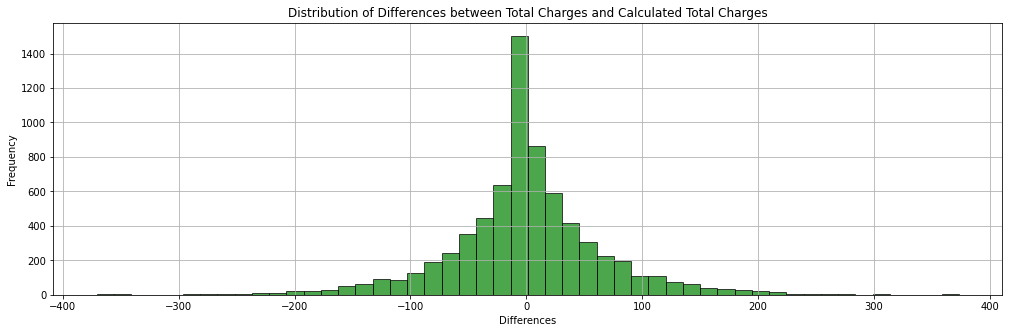

In [8]:
check_diff = client_data[['total_charges', 'monthly_charges', 'total_months', 'contract']].copy()
check_diff['calculated_total_charges'] = (
    check_diff['monthly_charges'] * check_diff['total_months']
)
check_diff['residuals'] = check_diff['total_charges'] - check_diff['calculated_total_charges']

plt.figure(figsize=(17, 5))
plt.hist(check_diff['residuals'], bins=50, color='green', edgecolor='black', alpha=0.7)
plt.title('Distribution of Differences between Total Charges and Calculated Total Charges')
plt.xlabel('Differences')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

It's possible that there are additional charges or services that contribute to the 'total_charges' and are not captured in the calculated values. This might include one-time fees, add-on services, special promotions, changes in pricing, changes in the contract for that period of time etc. Now, we can simply examine the discrepancies for each type of contract and what is the actual monetary difference.

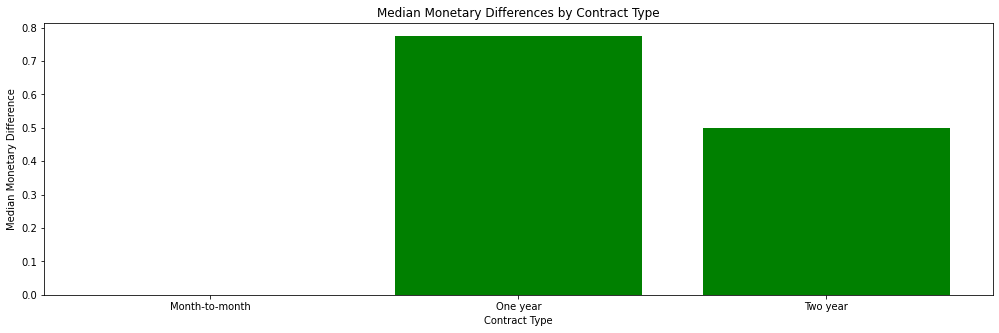

In [9]:
check_diff['monetary_difference'] = check_diff['total_charges'] - (check_diff['monthly_charges'] * check_diff['total_months'])

contract_diff_median = check_diff.groupby('contract')['monetary_difference'].median()

plt.figure(figsize=(17, 5))
plt.bar(contract_diff_median.index, contract_diff_median, color='green')
plt.title('Median Monetary Differences by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Median Monetary Difference')
plt.show()

The median difference is about $1 for all contract types. This means that half of our customers have charges that match up when we calculate them by multiplying the monthly charges by the number of months in the service, compared to the total charges in the dataset. We can just fill in the missing total charges by figuring them out from the monthly charges. No need to delete them.

In [10]:
client_data['total_charges'].fillna(client_data['monthly_charges'] * client_data['total_months'], inplace=True)

client_data['total_charges'].isnull().sum()

0

The other attribute with missing values is "churn_reason." It's likely that these null values correspond to users who have already churned. Let's verify if there are any instances of customers who have churned but haven't provided a reason.

In [11]:
churned_without_reason  = client_data[(client_data['churn_label'] == 'Yes') & client_data['churn_reason'].isna()]

churned_without_reason.sum(axis=1)

Series([], dtype: float64)

Great, all customers have given a reason for leaving the company, great news. Let's continue with the next step.

## Understanding and Visualizing the data

We've got a lot of data to look at before choosing a model. So, let's dig into the numbers and figure out what makes customers leave the service. We want to understand what influences customer churn.

In [12]:
client_data.nunique()

count                   1
country                 1
state                   1
city                 1129
zip_code             1652
lat_long             1652
latitude             1652
longitude            1651
gender                  2
senior_citizen          2
partner                 2
dependents              2
total_months           73
home_phone              2
multiple_phones         3
internet_service        3
online_security         3
online_backup           3
device_protection       3
tech_support            3
streaming_tv            3
streaming_movies        3
contract                3
paperless_billing       2
payment_method          4
monthly_charges      1585
total_charges        6531
churn_label             2
churn_value             2
churn_score            85
customer_value       3438
churn_reason           20
dtype: int64

In [13]:
client_data.groupby(['country','state']).size()

country        state     
United States  California    7043
dtype: int64

The first 3 features have just 1 value for all records. Looks like all of the customers in our data are from United States of America, California. And all of those 1129 cities are in that area.

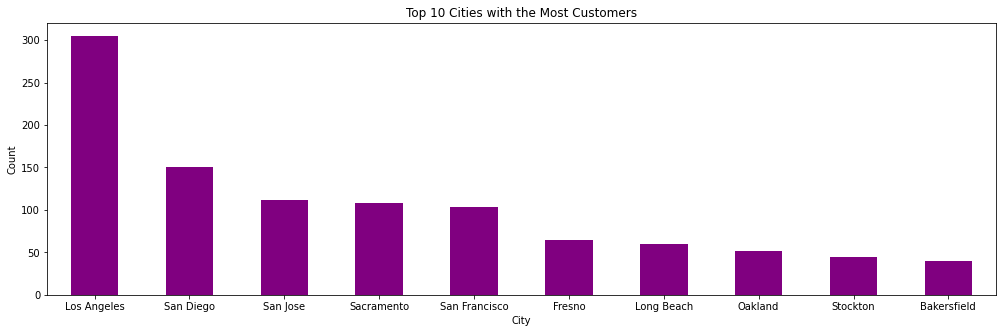

In [18]:
top_cities = client_data['city'].value_counts().nlargest(10)

plt.figure(figsize=(17, 5))
top_cities.plot(kind='bar', color='purple')
plt.title('Top 10 Cities with the Most Customers')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.show()

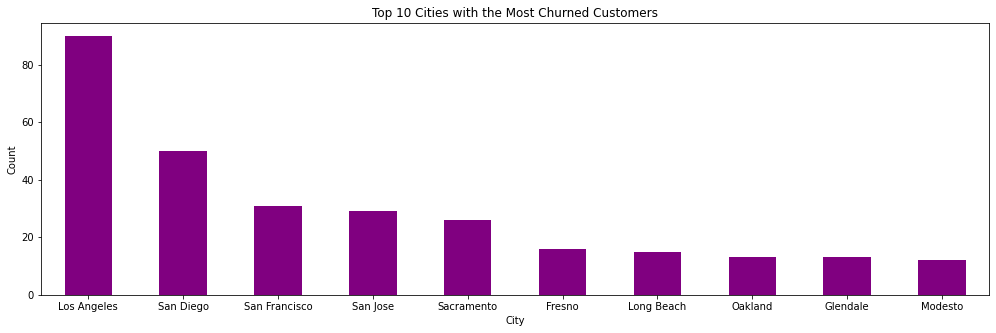

In [19]:
churned_clients_by_city = client_data[client_data['churn_label'] == 'Yes']['city'].value_counts().nlargest(10)

plt.figure(figsize=(17, 5))
churned_clients_by_city.plot(kind='bar', color='purple')
plt.title('Top 10 Cities with the Most Churned Customers')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In the chart above, it's noticeable that the churn percentage is proportionally dependent on the number of customers in each city. Considering this, I suggest excluding this feature from our machine-learning models.

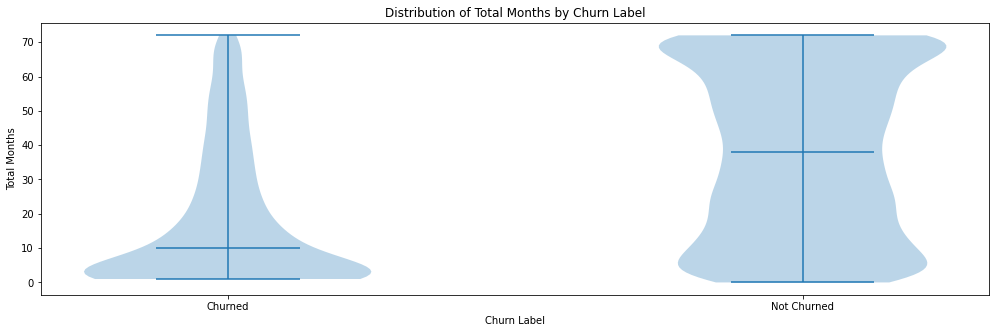

In [16]:
plt.figure(figsize=(17, 5))

plt.violinplot([
    client_data[client_data['churn_label'] == 'Yes']['total_months'],
    client_data[client_data['churn_label'] == 'No']['total_months']
    ],positions=[1, 2] ,showmedians=True
)
plt.title('Distribution of Total Months by Churn Label')
plt.xlabel('Churn Label')
plt.ylabel('Total Months')
plt.xticks([1, 2], ['Churned', 'Not Churned'])

plt.show()

This is interesting! It looks like the first six months are super important for keeping customers. After this time (from 6 to 12 months), the number of customers leaving sharply increases. On average, customers stick around for about 10 months, indicating that half of them decide to leave during this period. It's a key timeframe that significantly influences whether a customer stays with us.

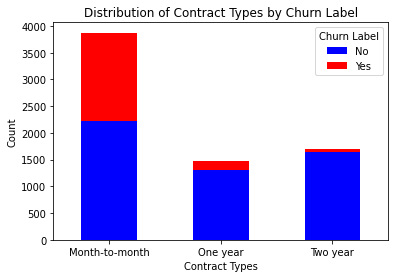

In [34]:
contract_counts = client_data.groupby(['contract', 'churn_label']).size().unstack()

contract_counts.plot(kind='bar', stacked=True, color=['blue', 'red'])
plt.title('Distribution of Contract Types by Churn Label')
plt.xlabel('Contract Types')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn Label')

plt.show()

Customers with a month-to-month contract have a higher likelihood of churning from the service which is normal. This aligns with the common practice among companies to make it more challenging to terminate contracts with longer durations, such as 1 or 2 years.